# **Importing the Libraries and Data** #

I imported the necessary libraries to complete this project. That includes pandas, numpy, and matplotlib. After doing so, I read in my two CSV files.

In [43]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data from csv files

stats = pd.read_csv('videos-stats.csv')
comments = pd.read_csv('comments.csv')

# **Showing the Dataframes** #

First, I wanted to show the two separate dataframes I created with the two CSV files I used for this project. I displayed the head of the first and second dataframes.

In [44]:
# Show first dataframe 

stats.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [45]:
# Show second dataframe

comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Merging and Joining the Data** #

Afterward, I used pandas to merge and the data on the Video ID column. Because my data is about popular YouTube videos and the comments of those videos, the unique video ID was the best choice for merging the data. I wanted to maintain columns from both dataframes so I did an outer join.

In [46]:
# Merge dataframes into a single dataframe

df3 = pd.merge(stats, comments, on='Video ID', how='outer')

df3.head()

,Unnamed: 0_x,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Unnamed: 0_y,Comment,Likes_y,Sentiment
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,1,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2,I will forever acknowledge this channel with t...,161.0,2.0
3,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,3,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,4,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Cleaning the Dataframe** #

This is where I started to clean up my data. I began doing so by dropping some columns that I knew I wouldn't need. After my merge and join, the original indexes were labeled as "Unnamed" so I remvoed both of those columns to make the dataframe more neat.

In [47]:
# Drop unneeded columns from dataframe 

youtube_data = df3.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

youtube_data.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


After dropping the unneeded columns, I decided to rename some columns. Both CSV files had columns of data labeled "Likes." In the first CSV files, "Likes" referred to video likes and in the second dataframe, the "Likes" column referred to likes associated with comments on the videos. In an effort to make the joined dataframe more organized and clear, I renamed the two "Likes" columns to "Video Likes" and "Comment Likes."

In [48]:
# Rename columns

youtube_data.rename(columns={'Likes_x': 'Video Likes', 'Likes_y': 'Comment Likes' , 'Comments' : '# of Comments'}, inplace=True)

youtube_data.head()

,Title,Video ID,Published At,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


Finally, although I didn't notice any null values in my data, I did a quick dropna command to remove any missing values just to be sure. 

In [49]:
youtube_data.dropna()

,Title,Video ID,Published At,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18623,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


This was the dataframe I ended up with. I ultimate named it youtube_data.

In [50]:
youtube_data.head()

,Title,Video ID,Published At,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Measuring the Sentiment of Comments** #

One thing I wanted to analyze in this project was sentiment amongst the comments left on these popular YouTube videos. I wanted to see how often neutral or neutral to positive comments were left in comparison to negative comments. I created a pie chart to visualize just that. 

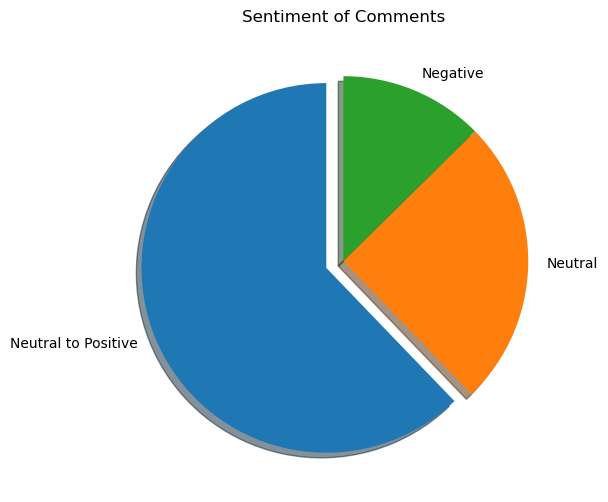

In [71]:
labels = 'Neutral to Positive', 'Neutral', 'Negative'
sizes = youtube_data['Sentiment'].value_counts().rename_axis('Sentiment').reset_index(name='mood_counts')

plt.figure(figsize=(6,6))
plt.pie(sentiment_data.mood_counts, labels=labels, startangle=90, shadow=True, explode=[0.1, 0.0, 0.0])
plt.title('Sentiment of Comments')
plt.show()

Additionally, I wanted to see how many people "liked" the different kinds of comments left. I suspected that the comment likes would reflect the same trend that the comments did, meaning majority of neutral to positive comments received more likes than negative comments. 

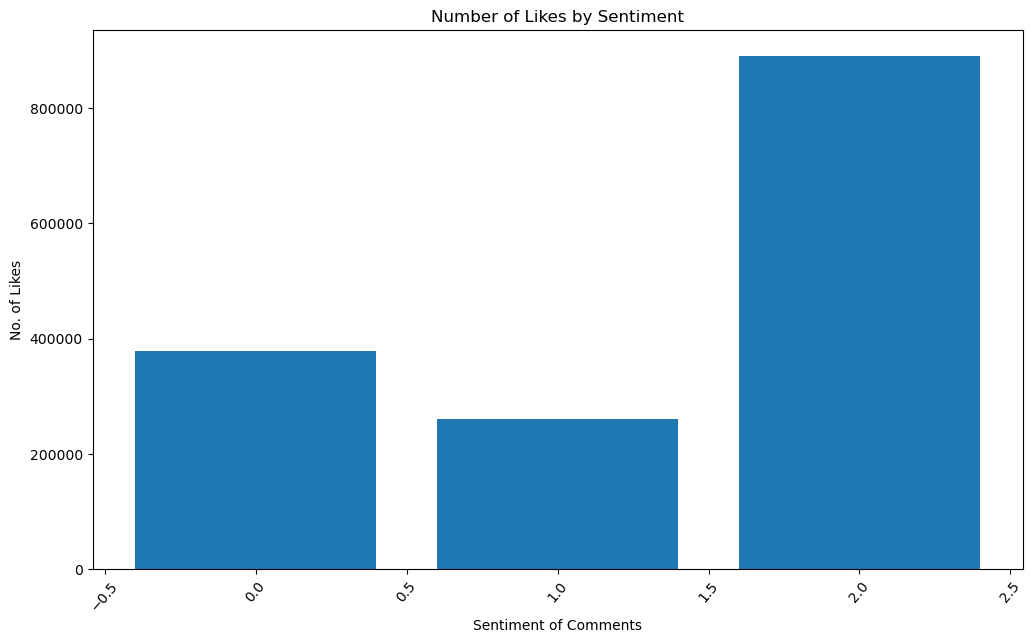

In [52]:
plt.figure(figsize=(12,7)) 
plt.bar(x=youtube_data['Sentiment'], height=youtube_data['Comment Likes'])
plt.xticks(rotation=50)
plt.title('Number of Likes by Sentiment')
plt.xlabel("Sentiment of Comments")
plt.ylabel("No. of Comment Likes")
plt.show()

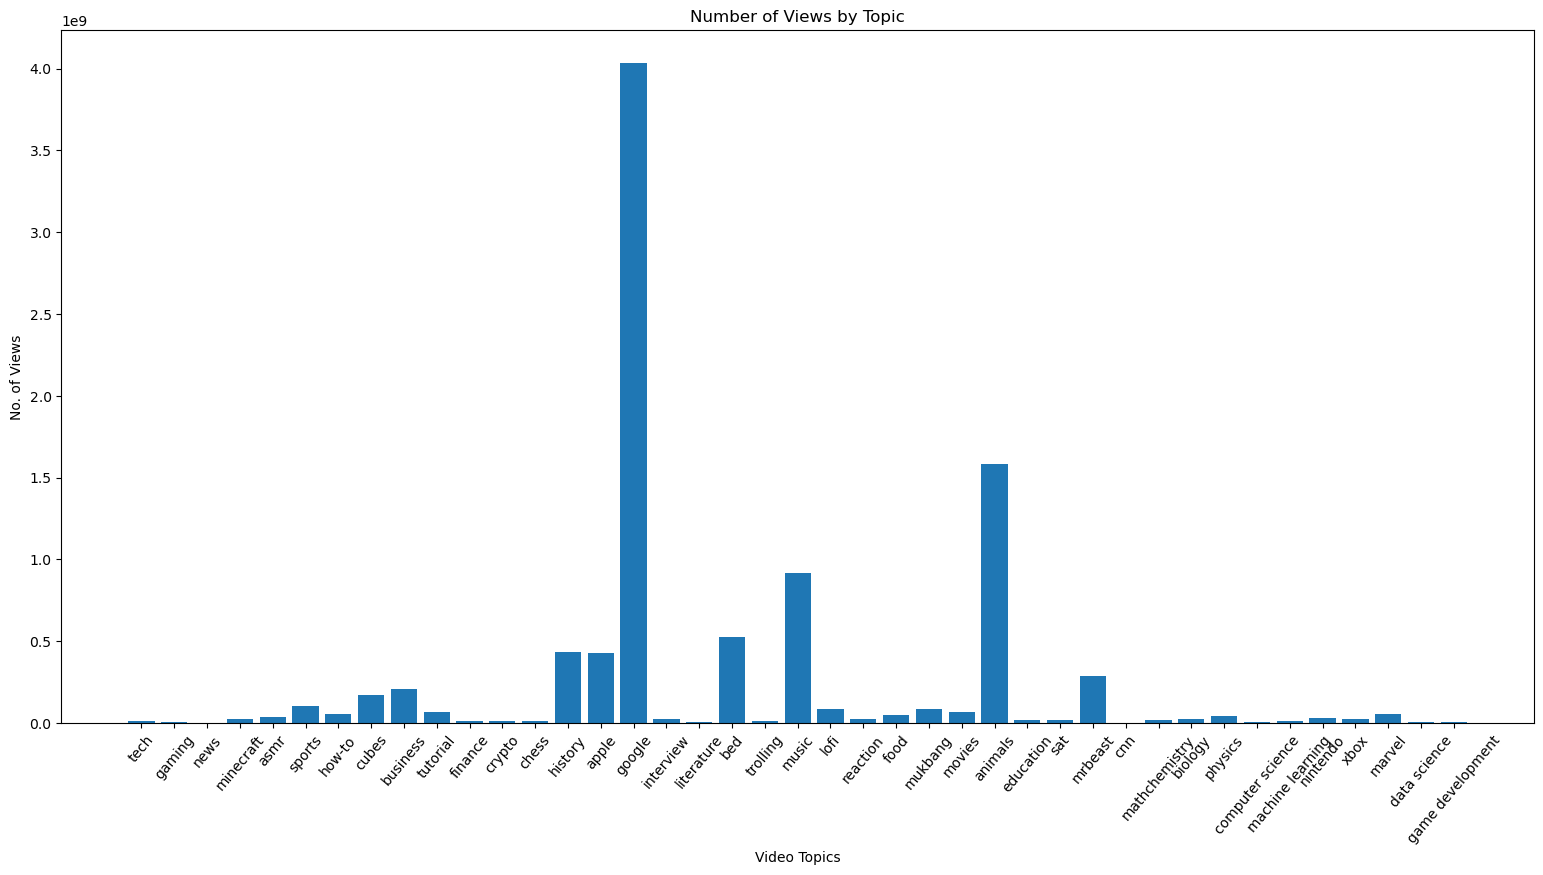

In [73]:

plt.figure(figsize=(19,9)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['Views'])
plt.xticks(rotation=50)
plt.title('Number of Views by Topic')
plt.xlabel("Video Topics")
plt.ylabel("No. of Views")
plt.show()

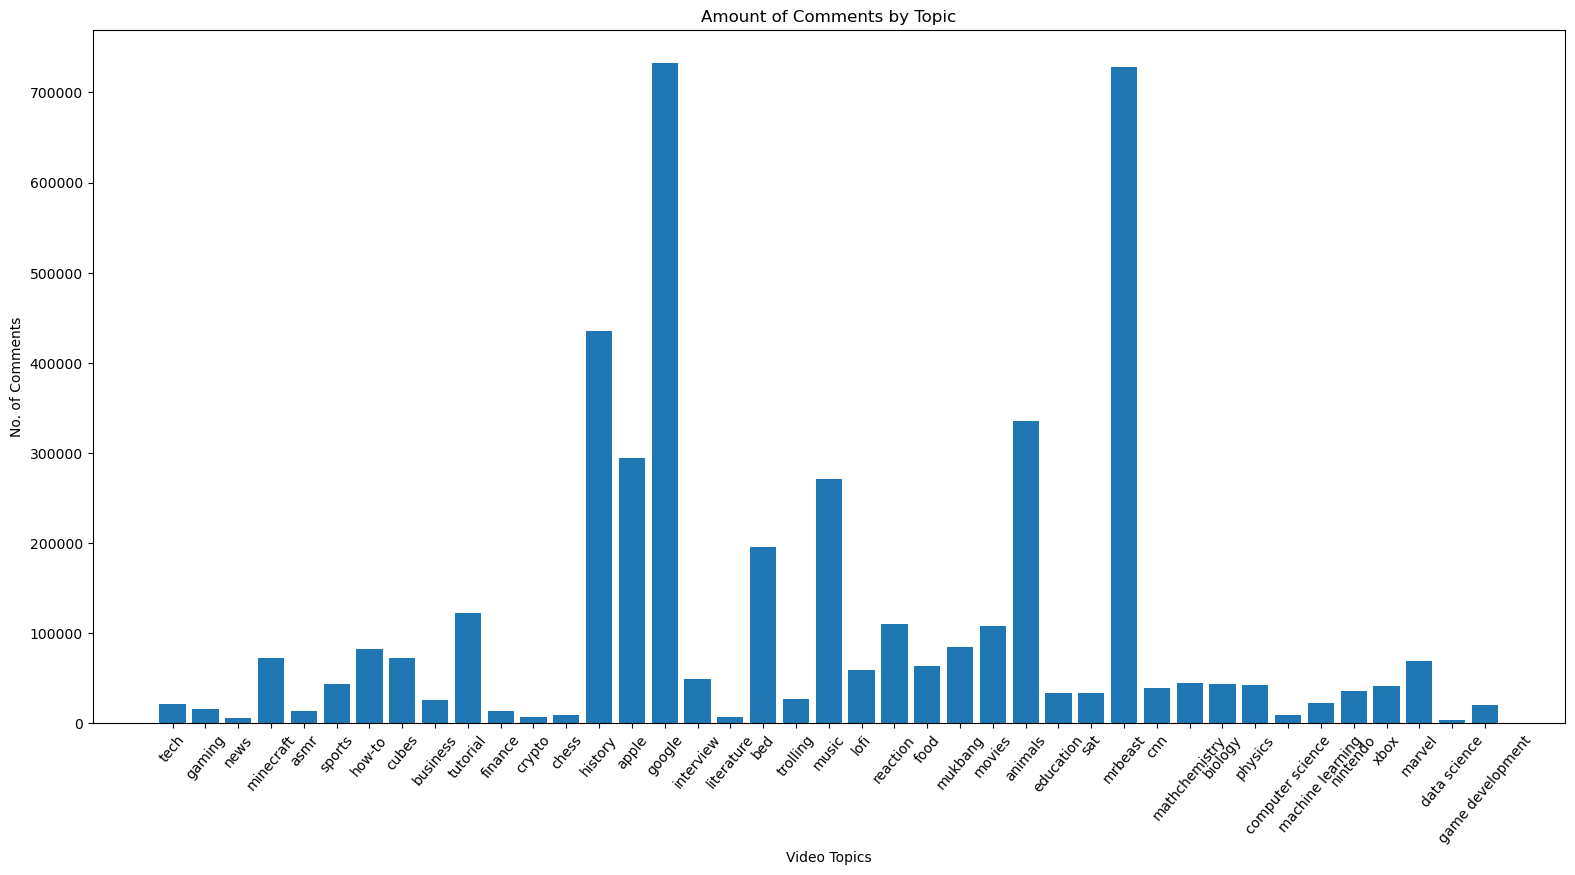

In [54]:
plt.figure(figsize=(19,9)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['# of Comments'])
plt.xticks(rotation=50)
plt.title('Amount of Comments by Topic')
plt.xlabel("Video Topics")
plt.ylabel("No. of Comments")
plt.show()